In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV

In [2]:
data = pd.read_csv("DataSets/NewProcessed.csv", index_col=0) 

In [3]:
data.columns

Index(['Year', 'Months', 'Day', 'MaxTemp', 'AvgTemp', 'MinTemp', 'MaxHumid',
       'MinHumid', 'AvgHumid', 'MaxPressure', 'AvgPressure', 'MinPressure',
       'MaxSpeed', 'AvgSpeed', 'MinSpeed', 'AvgDirn', 'Weather Description',
       'Temp6', 'Temp12', 'Temp20', 'Humid6', 'Humid12', 'Humid20', 'Press6',
       'Press12', 'Press20', 'WindDirn6', 'WindDirn12', 'WindDirn20',
       'WinSpeed6', 'WinSpeed12', 'WinSpeed20', 'WeatherDiscpc6',
       'WeatherDiscpc12', 'WeatherDiscpc20', 'maxTemp_next', 'minTemp_next'],
      dtype='object')

In [4]:
corr_matrix = data.corr()
corr_matrix["maxTemp_next"].sort_values(ascending=False)

maxTemp_next           1.000000
Temp20                 0.944877
minTemp_next           0.944495
MaxTemp                0.931333
AvgTemp                0.922156
MinTemp                0.888908
Temp12                 0.886566
Temp6                  0.868179
Months                 0.292521
Humid6                 0.180472
Humid12                0.162382
Year                   0.119342
MaxHumid               0.102457
Weather Description    0.051145
AvgHumid               0.030897
MinPressure            0.029656
Day                    0.015196
WeatherDiscpc12        0.000718
WeatherDiscpc20       -0.004022
WeatherDiscpc6        -0.008834
Press6                -0.044383
MinHumid              -0.055666
Press12               -0.056325
AvgPressure           -0.079589
Press20               -0.101066
WindDirn6             -0.123149
WindDirn12            -0.126600
Humid20               -0.142639
WindDirn20            -0.152690
WinSpeed20            -0.177718
AvgDirn               -0.204251
MinSpeed

In [5]:
data = data.drop(["Humid6","Humid12", "Year", "MaxHumid", "Weather Description", "AvgHumid", "MinPressure",
                 "Day", "WeatherDiscpc12", "WeatherDiscpc20", "WeatherDiscpc6", "Press6", "AvgPressure",
                 "Press20", "WindDirn6", "WindDirn12", "Humid20","WindDirn20", "WinSpeed20"], axis = 1)

In [6]:
data.columns

Index(['Months', 'MaxTemp', 'AvgTemp', 'MinTemp', 'MinHumid', 'MaxPressure',
       'MaxSpeed', 'AvgSpeed', 'MinSpeed', 'AvgDirn', 'Temp6', 'Temp12',
       'Temp20', 'Press12', 'WinSpeed6', 'WinSpeed12', 'maxTemp_next',
       'minTemp_next'],
      dtype='object')

In [7]:
y = data[["maxTemp_next"]]

In [8]:
x = data.drop(["maxTemp_next"], axis = 1)

In [9]:
x.head()

,Months,MaxTemp,AvgTemp,MinTemp,MinHumid,MaxPressure,MaxSpeed,AvgSpeed,MinSpeed,AvgDirn,Temp6,Temp12,Temp20,Press12,WinSpeed6,WinSpeed12,minTemp_next
0,10,22.70,18.74,16.89,43.0,1013.0,6,4.83,1,268.12,17.37,17.84,22.57,1012.0,6,5,16.39
1,10,20.73,17.92,16.39,46.0,1017.0,5,2.42,0,118.92,16.70,18.22,18.47,1016.0,3,1,17.97
2,10,23.12,19.84,17.97,83.0,1018.0,3,1.88,0,71.96,18.09,18.69,22.83,1018.0,3,2,19.43
3,10,24.12,21.89,19.43,78.0,1020.0,4,1.38,0,49.58,20.71,21.03,23.72,1020.0,0,0,15.63
4,10,27.63,20.80,15.63,39.0,1018.0,4,1.67,0,186.50,17.12,16.09,27.63,1018.0,2,1,15.86


In [10]:
val = 200
trainx = x[:data.shape[0]-val].to_numpy()
trainy = y[:data.shape[0]-val].to_numpy().ravel()

In [11]:
trainy

array([20.73, 23.12, 24.12, ..., 14.15, 20.15, 26.16])

In [12]:
testx = x[data.shape[0]-val:]
testy = y[data.shape[0]-val:]

In [13]:
testx.to_csv("maxData/testx.csv")
testy.to_csv("maxData/testy.csv")
testx = testx.to_numpy()
testy = testy.to_numpy().ravel()

In [14]:
testy.shape

(200,)

## Decision tree regressor model

In [15]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
decision_tree_reg = DecisionTreeRegressor()
param_decision=[
    {'max_depth': [1,2,3,4,5,6,7,8] }
]
grid_decision = GridSearchCV(decision_tree_reg,param_decision,cv=5,)
grid_decision.fit(trainx, trainy)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid=[{'max_depth': [1, 2, 3, 4, 5, 6, 7, 8]}])

In [16]:
grid_decision.best_estimator_

DecisionTreeRegressor(max_depth=5)

In [17]:
decision_tree_reg = DecisionTreeRegressor(max_depth=4)
decision_tree_reg.fit(trainx, trainy)

DecisionTreeRegressor(max_depth=4)

In [18]:
pred_decisionTree = decision_tree_reg.predict(testx)

In [19]:
decision_mse=mean_squared_error(pred_decisionTree, testy)
decision_rmse= np.sqrt(decision_mse)
decision_rmse

2.9880760332492735

In [20]:
decision_tree_reg.score(testx, testy)

0.6474429236911678

In [21]:
decision_tree_reg.score(trainx, trainy)

0.9149614469552739

In [22]:
tree_score = cross_val_score(decision_tree_reg,trainx, trainy, scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-tree_score)

In [23]:
def display_score(scores):
    print("Scores:", scores)
    print("Mean:",scores.mean())
    print("Standard Devidation:",scores.std())

In [24]:
display_score(tree_rmse_scores)

Scores: [3.08010779 3.42560213 3.40893559 3.39644714 3.01010948 2.94483156
 2.8265598  3.44105527 2.90844398 3.34309299]
Mean: 3.178518573080008
Standard Devidation: 0.23390523491464885


In [25]:
def plot_temp(pred, test):
    plt.figure(figsize= (20,5))
    plt.plot(pred, "r")
    plt.plot(test)
    plt.xlabel("TestData Number", fontsize=20)
    plt.ylabel("Tempearture", fontsize=20)

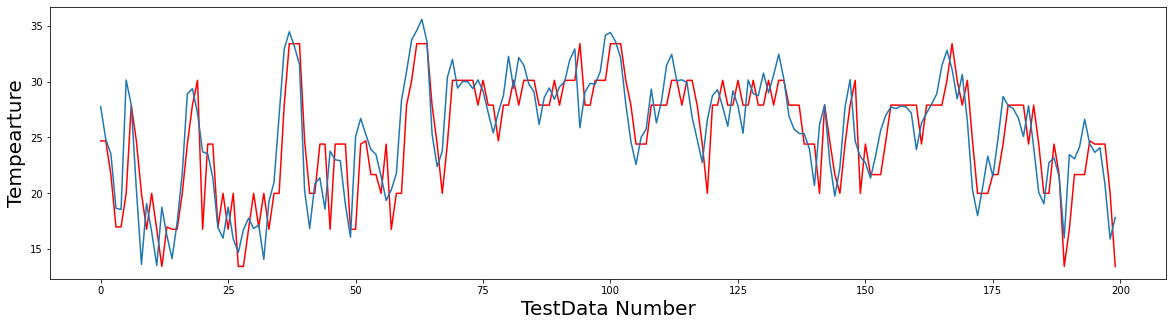

In [26]:
plot_temp(pred_decisionTree, testy)

## Linera Regression model

In [27]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
linear_paramn= [
    {"fit_intercept":[True, False],
    'normalize':[True, False],
     'n_jobs': [1,2,3,4,5]
    }
]
grid_linear = GridSearchCV(lin_reg, linear_paramn, cv=10)
grid_linear.fit(trainx, trainy)

GridSearchCV(cv=10, estimator=LinearRegression(),
             param_grid=[{'fit_intercept': [True, False],
                          'n_jobs': [1, 2, 3, 4, 5],
                          'normalize': [True, False]}])

In [28]:
grid_linear.best_estimator_

LinearRegression(n_jobs=1, normalize=True)

In [29]:
lin_reg = LinearRegression(n_jobs=1, normalize=True)
lin_reg.fit(trainx, trainy)
pred_linearReg = lin_reg.predict(testx)

In [30]:
lin_mse=mean_squared_error(pred_linearReg, testy)
lin_rmse=np.sqrt(lin_mse)
lin_rmse

2.5496957663132376

In [31]:
lin_reg.score(testx, testy)

0.7433017704467728

In [32]:
lin_reg.score(trainx, trainy)

0.9276985264793043

In [33]:
lin_reg_scores = cross_val_score(lin_reg,trainx, trainy, scoring="neg_mean_squared_error", cv=10)
lin_reg_scores_rmse = np.sqrt(-lin_reg_scores)

In [34]:
display_score(lin_reg_scores_rmse)

Scores: [2.59119088 3.02573737 3.18083085 2.87711703 2.64130176 2.77829004
 2.19382579 2.85951894 2.49787387 3.0509682 ]
Mean: 2.7696654727353263
Standard Devidation: 0.2805792783751423


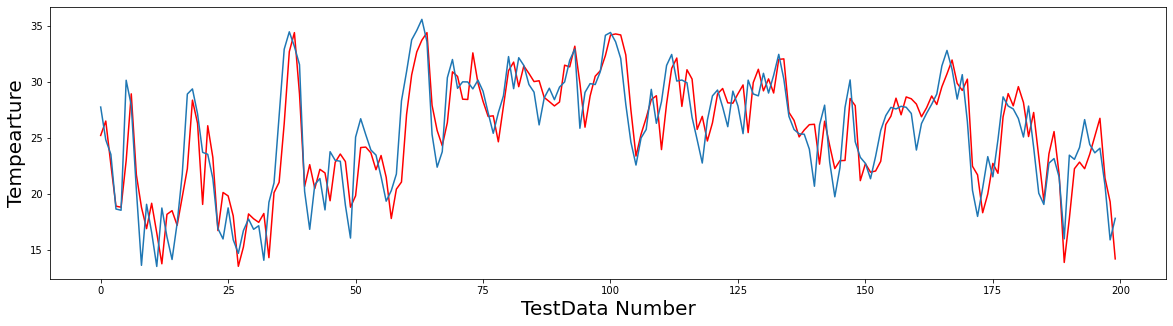

In [35]:
plot_temp(pred_linearReg, testy)

In [36]:
import joblib
file_name = "maxModel.sav"
joblib.dump(lin_reg, file_name)

['maxModel.sav']

## Random Forest model

In [37]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
param_forest = [
     {'n_estimators': [20,30,40, 45, 50], 'max_features': [2,3,6,8,10,12,14] },
     {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
 ]
grid_forest = GridSearchCV(forest_reg, param_forest, cv=5,
    scoring='neg_mean_squared_error',
    return_train_score=True)
grid_forest.fit(trainx, trainy)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 3, 6, 8, 10, 12, 14],
                          'n_estimators': [20, 30, 40, 45, 50]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [38]:
grid_forest.best_estimator_

RandomForestRegressor(max_features=14, n_estimators=45)

In [39]:
forest_reg = RandomForestRegressor(max_features=10, n_estimators=45)
forest_reg.fit(trainx, trainy)
forest_pred = forest_reg.predict(testx)

In [40]:
forest_mse = mean_squared_error(forest_pred, testy)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

2.513699570428091

In [41]:
forest_reg.score(trainx, trainy)

0.9889354835986235

In [42]:
forest_reg.score(testx, testy)

0.7504986559174969

In [43]:
forest_scores = cross_val_score(forest_reg,trainx, trainy, scoring="neg_mean_squared_error", cv=10)
forest_scores_rmse = np.sqrt(-forest_scores)

In [44]:
display_score(forest_scores_rmse)

Scores: [2.8130719  2.91274792 3.01762032 2.98588218 2.74303959 2.78302416
 2.39170624 2.90386914 2.48365621 3.06826519]
Mean: 2.810288285526113
Standard Devidation: 0.21137647137107843


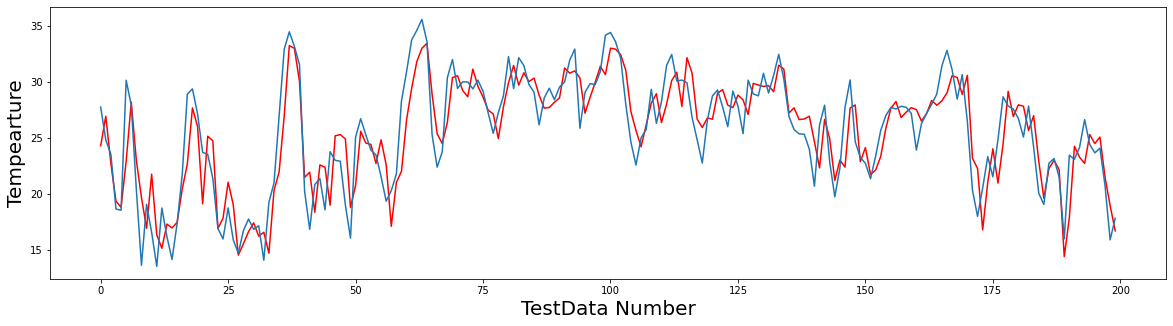

In [45]:
plot_temp(forest_pred, testy)